# CS110 Assignment 3
# **Project 1 - A Day in the Life of a Minervan (Part I)**


## **<font color='green'> Deliverables </font>**
The following questions will guide you through your work. They are thorough to make sure you are
given clear directions on how to approach this LBA.

## **<font color='green'> Q1 - Setting up: </font>**
* A. Prepare a table containing all the tasks you plan to do in the city of your rotation. The table needs to include a total of eight tasks.*
* B. Explain why each of the tasks you have chosen above is relevant to include in your schedule. Use this prompt to engage more deeply with the culture you are exposed to in your current location.

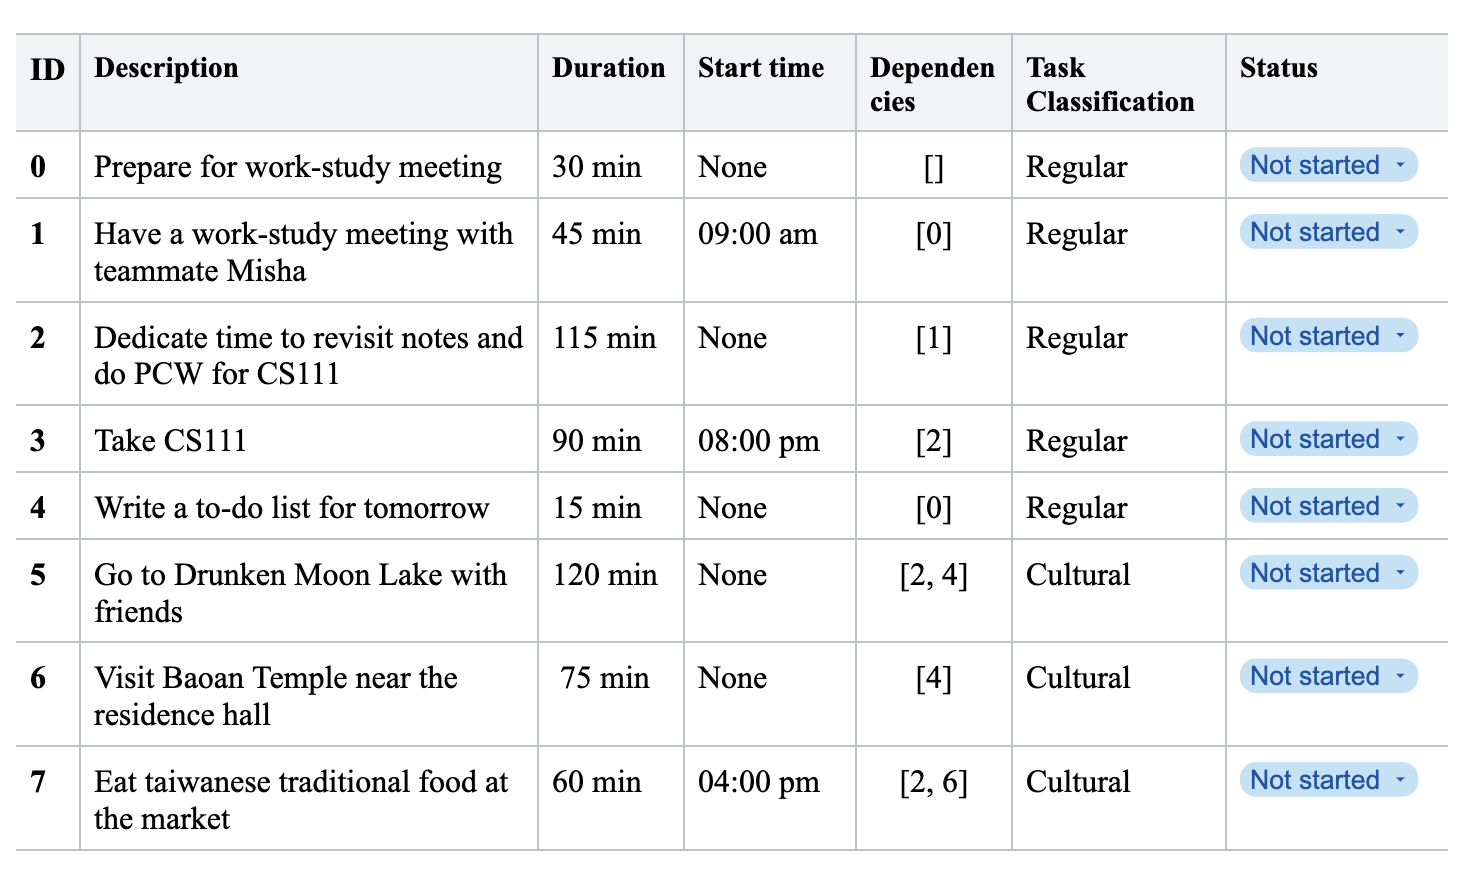

In [80]:
from IPython.display import Image
Image("Table_of_tasks.png", width = 500)

 All of the regular tasks included in the table are a part of my daily routine since they are the basic set for me as a Minerva student. In particular, since most of the Minervans have work-study, it is essential to dedicate some time to catch up with the teammates and ensure that your work contributes to the whole project. Hence, the first two tasks in my table are regarding preparation for the meeting and having the meeting with my teammate Misha who we work on a Notion template for internship search together. Afterward, since I take CS111 and have the class at 8 pm, I require the pre-class work to be done beforehand to ensure good performance in class. I can’t help mentioning that every day should include 15 minutes for planning the next day since it helps me understand the main tasks I need to do and how to manage time efficiently to make the most out of my schedule.
   
   Moreover, since I am in Taipei right now, I try sightseeing at least once a week because this semi-tropical island in East Asia is well-known for its fascinating ancient culture, historical inheritances, and food. Hence, I decided to include visiting the Baoan Temple because it is one of the greatest Taiwanese folk religion temples that preserves collections of murals, woodwork, and ceramics created by the most famous Taiwanese masters of all times. Moreover, Taipei is known for its nature, and one of the lakes with a valuable story behind it is Drunken Moon Lake. Since Taipei has lots of food markets with authentic Taiwanese food, I decided to include a visit to Raohe St. Night Market, which is almost a one-kilometer street full of food, drinks, and souvenirs. 
    
   However, it is worth mentioning that this table is not a quite accurate representation of my schedule since it should have included more tasks regarding academics (preparation for two classes, taking two classes, outlining assignments, and so on), and simple small things (buying groceries, talking to family, cooking, getting to location, going to the residence hall) which would create a huge chain of dependencies to particular tasks. 

## **<font color='green'> Q2 - Preparing your algorithmic strategy: </font>**

### A. Why is a priority queue a particularly well-suited data structure to prioritize tasks? Why don’t we simply sort a list of tasks?

Since a priority queue is a data structure used for maintaining the elements that have a particular priority associated with them, we need to understand that implementation of the priority queue with the use of heaps will be more time efficient than using the list. The reason behind this is that if we work with n elements and we need to insert them into list, we can do that in O(n) time since we might need to shift all the elements to find the right position of the element in the list, and then using the built-in function sort() to sort the list in the ascending order would result in time complexity of O(n log n). In comparison, implementing a priority queue with the use of heaps (specifically min heap) will result in time complexity of O(log n) for the element insertion using the method heappush() because we will insert the element at the last position available in a heap, and we might require to bubble it up to the root to restore the min-heap property, which requires the number of swaps proportional to the height of the heap, which is log n. Moreover, finding the minimum priority element in the min heap is O(1) since, referring to the min-heap property, the root element is the element with the lowest priority value. Suppose we want to extract the minimum priority element from the heap by using the method heappop(). In that case, we will pop the root element from the heap and put the last right-most element in a heap among the leaf nodes into the root position, and this might result in failing the min-heap property, which will require us to bubble the element all the down in the tree of height log n in the worst case scenario and will result in time complexity of O(log n) using heapify(). Since we should always consider data structures and algorithms that have a more efficient implementation in terms of time and space, we can derive the conclusion that using a priority queue implemented with a min-heap is more time efficient than using the list.
To implement a task scheduler, we need to work with fixed-time and flexible-time tasks, which will require us to use two priority queues since their priority values will be calculated differently. In class Dependencies, I will calculate the priority for fixed-time tasks using the method priority_time_bound_task(), which will assign the priority of the fixed-time task based on its start time. This implies that the lower the number correspondng to the priority value, the higher prioriy it correspond to, the faster we should execute the task since it will have the earliest starting time. I will calculate the priority for flexible-time tasks in method priority_flexible() by taking into account all of the dependencies of the task (dependencies of dependencies), and the duration of the task. The fewer dependencies the flexible task has and the shorter its duration, the faster the task should be executed. The reason behind leaning towards flexible tasks with shorter duration is that I am a risk-averse person who tends to procrastinate on longer tasks as they might be more difficult or require a bit more effort, and due to the “path of least resistance,” I choose smaller tasks to be completed first since it will generate the motivation for further task completion and will give the feeling of productivity. Therefore, as we can see, the smaller the number corresponding to the priority value, the earlier it should be executed, implying that Min Heap should be used for the algorithm implementation. 


### B. Describe how your scheduler will work at a very high level. Consider explaining the algorithmic approach to scheduling to a peer who has not taken CS110 before.

As mentioned before, the scheduler works based on the two priority queues containing fixed-time tasks and flexible-time tasks, which means that the tasks with lower priority are at the top of the queue and will be the first tasks executed from the queue. The algorithm implemented decides the priority of the fixed-time task based on its start time, and the smaller the start time is, the faster we should start doing that task. We also need to prioritize the flexible time tasks to ensure that the scheduler will follow the correct order of task execution. For instance, based on the tasks provided, we can see that there is a flexible task “Prepare for work-study meeting”, and it does not have dependencies, which logically implies that we can execute it first because there is nothing we should do before this task. However, if we look at the task “Take CS111,” we can see that it depends on Task 2 (regarding preparation for this class) meaning that we cannot go to class without finishing the PCW.
Moreover, we cannot do Task 2 if we have not done Task 1, and we cannot start Task 1 if we haven’t done Task 0. If we follow this pattern, we will understand that flexible tasks depend on many others, and we cannot do them until all dependencies are completed. Hence, the flexible task that has the smallest number of dependencies should be executed first because we do not need to follow a chain of events that should happen for the flexible task to be completed finally. However, we might encounter the chance of two tasks having the same number of dependencies and hence, the same priority. To eliminate this possibility, we will tend toward executing the task with shorter duration. To do that, we will calculate the priority by adding the number of dependencies and duration divided by a large number since it will help us differentiate between priorities (they will differ by decimals). In particular, this can be done by using formula: **number of all dependencies + duration/100,000**. 

Since we prioritized flexible and fixed tasks at this stage, we can go to execution of the tasks and create the Task Scheduler. Depending on when our day starts, we will look at when the first fixed-time task starts (lowest priority - shortest time of the start), and the duration of the first flexible task (lowest priority - the lowest: number of dependencies + duration/100,000). If the day starts at 08:00 am, and the first fixed-time task starts at 9:00 am, we should check whether the duration of the first flexible-time task plus the current time are less than the start of the fixed-time task. If it is, we start doing a flexible-time task and check whether the same condition works for the next flexible-time task. If we can fit in the time gap between the current time and the start of the fixed-time task, we will work on completing flexible-time tasks. If the current time plus the duration of the next flexible task executed from the queue is bigger than the starting time of the next fixed-time task, we execute the fixed-time task and update our current time to the start time of the fixed-time task. This will continue until we are left with no fixed time tasks, and we will do a check on whether there are flexible-time tasks left. If there are some of them left, we will execute them, and if not, the Task Scheduler will finally be compiled. 

### C. Explain how you have defined and computed the priority value of each task.

In my algorithm implementation (Appendix B), methods **priority_time_bound_task()**, and **priority_flexible()** are created to compute priority values for fixed-time tasks and flexible-time tasks dynamically. Given the task attributes (id, start time, description, dependencies, duration, status, priority), I created a hashmap tasks_map for better information usage, with the key as the task ID, and the value is the list of all the attributes. Since I needed to separate tasks into two parts, flexible and fixed, I created a method **filter_time_bound_tasks()** that takes the boolean True or False as the input, and outputs the list of IDs of either time-bound or flexible tasks. Since one of the attributes of the task is the start time, it is set to either be a 0 (flexible task), or actual time in minutes (fixed task), and converting it into a boolean will produce either False (bool(0)), or True (bool(number > 0)). Having the tasks separated, we can dive deeper into the mechanics of the methods that compute priority. 

In **priority_time_bound_task()**, since I work with IDs of time-bound tasks, I created a list of tuples of the following form (start time, ID). I decided to prioritize the fixed-time tasks based on their start time, meaning that the event starting the earliest will have the priority equal to its start time, which will be the smallest value. I further transformed the list of tuples into a list of sublists since tuples are immutable, and we can’t alter data inside, and I could not extract the elements from the tuple. By using min heap to implement priority queue, we will ensure that the root node will always be the node with the smallest priority, and hence, the fixed task that will be executed first will be the one that starts the earliest. 

For the method **priority_flexible()**, our primary focus will be on the dependencies of the task, and in particular, all the dependencies that are tied to initial dependencies. This method takes **dictionary “dependencies”** as an input, which is compiled by using methods **get_task_dependencies() and get_all_dependencies()**, and assigns priority based on the number of all dependencies. This dictionary has the key as the ID of a particular task, and the value is the list of all dependencies since it is important to account for the chain of dependencies of the initial dependencies of the task because they should be executed first to ensure that we can complete the initial dependencies of the task. However, there might be a case when the number of all dependencies of the tasks will be equal, which will be a problem when we change the order of the tasks. Hence, we can calculate the priority based on the number of dependencies and the duration of the task divided by a very large number of 100,000. This will not have a great impact on the overall priority calculated only based on dependencies, but this will help us account for the cases when the tasks have the same number of dependencies. In this case, tasks with the same number of dependencies and smaller duration will be executed first. However, this will not impact the tasks which priorities differ by more than 

Therefore, to implement the priority queues based on the computed priorities, we would require using Min Heap (Appendix A) where we will push the tuples of the form (priority value, ID of the task) since the value of the parent node will always be less than or equal to the value of its children nodes, and the root node will have the smallest value. To push the tuples into the two different heaps, I created two methods in **class TaskScheduler** called create_heap_fixed() and create_heap_flexible() that are responsible for compiling the heaps based on the first element of the tuple. For the scheduler to work, we will pop the root node with the smallest priority value each time(the smaller the priority value - the faster it should be executed) and apply heapify() on the heap to restore the min-heap property so that each time the root node has the smallest priority. The way that the method run_task_scheduler() works is that it checks whether the heap with the fixed-time tasks is not empty, and if it's not, it will pop the first fixed-time task with the earliest starting time, and further check whether the heap with flexible-time tasks is not empty. If this condition holds true, we also check whether the difference between the start of the fixed-time task and the current time allows us to fit in the flexible task in between (the one that has the lowest number of dependencies, or even none because it's on top of min heap). If the duration of the flexible-time task plus the current time is less than the start of the fixed-time task, we will start doing the flexible task. Since we popped element from the min heap, we will apply heapify() and restore the min heap property so that the next task with the smallest value for priority is on top. We will continue checking the condition of whether we can fit in the flexible task, and when it does not hold true, we will execute the fixed-time task, and set the current time to the start time of the fixed-time task + its duration. We will apply heapify() for the heap with fixed-time tasks, and conitnue the procedure of checking whether the current time + duration flexible-time task are less than the start time of the fixed time task. This will stop when the heaps will exhaust themselves and there will be no tuples left in them. 

## **<font color='green'> Q3 – Python implementation </font>**

### A. Start with providing your own OOP implementation of the MaxHeapq or MinHeapq (depending on your choice of the previous question).

In [81]:
#Code is taken from CS110 Session 13 - [7.2] Heaps and priority queues and adjusted to satisfy the goals of the algorithm 
class MinHeapq:
    """ 
    A class that implements properties and methods 
    that support a min priority queue data structure

    Attributes
    ----------
    heap : arr
        A Python list where key values in the min heap are stored
    heap_size: int
        An integer counter of the number of keys present in the min heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap= []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
    
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def mink(self):     
        """
        Returns the smallest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the smallest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, task_priority):  
        """
        Insert a key (priority of the task) into a priority queue maintaining the 
        min heap property 
        
        Parameters
        ----------
        task: list 
            List of 2 elements created from a tuple of the form (priority value, ID)
             
        Returns
        ----------
        None
        """
        key = task_priority[0] #task_priority is a tuple of form (priority, id)
        task_priority[0] = float("inf")   
        self.heap.append(task_priority)  
        self.decrease_key(self.heap_size, key)  
        self.heap_size += 1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min priority queue
        with a smaller value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key > self.heap[i][0]:
            raise ValueError('New key is larger than the current key')
        self.heap[i][0] = key  
        
        while i > 0 and self.heap[self.parent(i)][0] > self.heap[i][0]: 
            j = self.parent(i)
            holder = self.heap[j]

            self.heap[j] = self.heap[i]
            self.heap[i] = holder

            i = j    
            
       
    def heapify(self, i):
        """
        Creates a min heap from the index given
        (index is the root node of the subtree that we need ot heapify)
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)

        heap = self.heap
        if l <= (self.heap_size-1) and heap[l][0] < heap[i][0]:
            smallest = l 

        else:
            smallest = i

        if r <= (self.heap_size-1) and heap[r][0] < heap[smallest][0]:
            smallest = r

        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i] 
            self.heapify(smallest) 
            
    def heappop(self):
        """
        Returns the smallest key in the mim priority queue
        and remove it from the mim priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the min value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')

        mink = self.heap[0] #tuple at the top of the list of the form (smallest priority, ID)

        self.heap[0] = self.heap[-1] 

        self.heap.pop()
        self.heap_size -= 1

        self.heapify(0) #restoring min heap structure  
        return mink

#### Test-driving the algorithm: providing three test cases to demonstrate that the code works as intended (Appendix C).

In [82]:
#list of 8 random sublist of the form (priority, id)

A = [[6, 1],[4, 0],[7, 2],[9, 6], [5, 3], [8, 5], [12, 4], [0, 7], [3, 8]]
min_heap = MinHeapq()

for key in A:
    min_heap.heappush(key)
min_heap_list = min_heap.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[0, 7], [3, 8], [7, 2], [4, 0], [6, 1], [8, 5], [12, 4], [9, 6], [5, 3]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[0, 7], [3, 8], [7, 2], [4, 0], [6, 1], [8, 5], [12, 4], [9, 6], [5, 3]]
✅ Your code returned the expected result!


In [83]:
# list of 5 random sublists of the form (priority, id)
B = [[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]]
min_heap_1 = MinHeapq()

for key in B:
    min_heap_1.heappush(key)
min_heap_list = min_heap_1.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]]
✅ Your code returned the expected result!


In [84]:
# list of 7 random sublists containing negative priorities and priorities with decimals
C = [[12, 8],[-3, 4],[0.5, 5],[3.33, 3], [5, 0], [12.99, 2], [1.21, 1]]
min_heap_2 = MinHeapq()

for key in C:
    min_heap_2.heappush(key)
min_heap_list = min_heap_2.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[-3, 4], [3.33, 3], [0.5, 5], [12, 8], [5, 0], [12.99, 2], [1.21, 1]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[-3, 4], [3.33, 3], [0.5, 5], [12, 8], [5, 0], [12.99, 2], [1.21, 1]]
✅ Your code returned the expected result!


### B. Program an activity scheduler in Python, which receives the list of tasks above as input and returns a schedule for you to follow.

In [85]:
from typing import List, Dict
from collections import deque

class Task:
    """
    This is a Task class that stores the information about the instance of the task.  
    Attributes
    ----------
    id : integer
        This is the ID of the task, corresponding to the parameter id.
    time : integer
        This is the starting time of the task, corresponding to the parameter time.
    description : str
        This is the description of the task, corresponding to the parameter description.
    duration : integer
        This is the duration of the task, corresponding to the parameter duration.
    status : str
        This is status of the task, corresponding to the parameter status.
    priority : integer
        This is the priority of the task, corresponding to the parameter rotation_city .
    """
    def __init__(self, id: int, time: int, description: str, duration: int, dependencies: List[int], status: str, priority: int):
        
        self.id = id
        self.time = time
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.priority = priority

   

    def __repr__(self):
        #return f"Task id: {self.id} priority: {self.priority}   \n"
        return f"Task ID : {self.id}, time : {self.time}, description : {self.description}, duration : {self.duration}, dependencies : {self.dependencies}, status : {self.status}, priority : {self.priority}"



class Dependencies:
    """ 
    A class that implements the methods for finding all the dependencies of the task (dependencies of dependencies), 
    and calculates priorities for the tasks dependending on whether they are fixed or flexible. 

    Attributes
    ----------
    task_map : dict
        A Python dictionary where key values are the IDs of the particular tasks, 
        and the values is the list of all the input attributes given 
        (id, start time, description, duration, dependencies, status and priority)

    """  

    def __init__(self, tasks: List[Task]):
        self.task_map = {task.id: task for task in tasks}


        
   #get dependencies of the dependencies in form of dictionary for all tasks 
    def get_all_dependencies(self) -> Dict[int, List[int]]:
        """
        Creating a dictionary where the key is the ID of the task, and values are the 
        list of all dependencies (dependencies of dependencies).

        Parameters
        ----------
        None

        Returns
        ----------
        Dict
            Dictionary where values are the lists of all the dependencies, and keys are the IDs of the tasks

        """
        res = {}
        for key in self.task_map.keys():
            res[key] = self.get_task_dependencies(key)
        return res



    def get_task_dependencies(self, id: int): #graph search 
        """
        Creating a list of all the dependencies of the task, meaning that it finds the dependencies of the initial dependencies
        using queue

        Parameters
        ----------
        ID: int
            ID of the task to gather the dependencies of

        Returns
        ----------
        List
            List containing all the dependencies of the given task

        """
        if self.task_map.get(id) is None:
            raise KeyError(f"No key with value {id}")
        result = [] 
        queue = deque(self.task_map.get(id).dependencies)
        while queue: 
            cur_id = queue.pop()
            result.append(cur_id)
            for dependency in self.task_map.get(cur_id).dependencies:
                queue.append(dependency)
        return result #list of all dependencies of dependencies of a particular task
   



    def priority_time_bound_task(self, tasks_map: Dict[int, List[int]]):
        """
        Creating a list of tuples where the first element corresponds to the priority of the time bound task based on the start time, and
        the second element is the ID of the time bound task. 

        Parameters
        ----------
        tasks_map: Dict
            Dictionary where the IDs of the task is a key, and values 
            are all the attributes given in the Task class (id, start time, description, dependencies, status, priority, duration)

        Returns
        ----------
        List
            List containing tuples of the form (priority based on the start time, ID) for the time bound tasks 

        """
        list_of_fixed_time_tasks = tasks_map.filter_time_bound_tasks(True)   #getting all the IDs of tasks that have fixed time 

        priority_list = [] #initializing list of tuples of form (priority based on the start time, id)
        tuples_list = []  #initializing list of tuples of form (starting time, id)

        for element in list_of_fixed_time_tasks:
            tuples_list.append((self.task_map[element].time, self.task_map[element].id)) #creating tuples of the form (start_time, id)
            
        for tuple_ in tuples_list:
            tuple_ = list(tuple_) #tuples are immutable, so we can't chaneg anything inside
            cur_priority = self.task_map[tuple_[1]].time 
            if self.task_map[tuple_[1]].priority == 0:
                self.task_map[tuple_[1]].priority = cur_priority
                priority_list.append((cur_priority, self.task_map[tuple_[1]].id)) 
                
        return priority_list



    def priority_flexible(self, dependencies: Dict[int, List[int]]):
        """
        Creating a list of tuples where the first element corresponds to the priority of the flexible task based on the number of dependencies and duration, and
        the second element is the ID of the flexible task. 

        Parameters
        ----------
        dependencies: Dict
            Dictionary where the IDs of the task is a key, and values are 
            all gathered dependencies (dependencies of dependencies)

        Returns
        ----------
        List
            List containing tuples of the form (priority based on the number of all dependencies and duration/1000000, ID) for the flexible tasks. 

        """
        input_tasks = self.task_map 
        flexible_tasks = {} #initializing dictionary where all the flexible tasks Ids will be keys, and list of dependencies will be values 
        list_of_priorities = []
        

        for i in input_tasks: 
            if self.task_map[i].priority == 0 and self.task_map[i].time == 0: #additional checks to we avoid duplicates 
                flexible_tasks[i] = self.get_task_dependencies(i)

        for key, dependencies in flexible_tasks.items(): 
            self.task_map[key].priority = len(dependencies) +  (self.task_map[key].duration)/100000
            list_of_priorities.append((self.task_map[key].priority, self.task_map[key].id))
            
        return list_of_priorities



class TaskMap:
    def __init__(self, tasks: List[Task]):
        self.task_map = {task.id: task for task in tasks}



    def filter_time_bound_tasks(self, time_bound: bool):
        """
        Getting tasks of interest: time bound or flexible tasks. 
        
        Parameters
        ----------
        time_bound: bool
            True or False depending on what kind of tasks we want to wotk with:

            True - executing time bound tasks
            False - executing flexible tasks

        Returns
        ----------
        List
            List containing IDs of either time bound tasks or flexible tasks.
        """
        result = []
        for id in self.task_map:
            
            if bool(self.task_map[id].time) == time_bound: # 0 corresponds to False, number greater than 0 correspond to True 
                result.append(self.task_map[id].id) 
                
        return result



class TaskScheduler:
    """
    A Simple Daily Task Scheduler that uses priority queues to execute the tasks scheduled for the day in the right order 
    
    Attributes
    ----------
    tasks : List
        List of all the given tasks with their attributes 

    task_map : Dict 
        A Python dictionary where key values are the IDs of the particular tasks, 
        and the values is the list of all the input attributes given 

    priority_queue_fixed : min heap 
        A priority queue of fixed time tasks that has the min heap structure 
        
    priority_queue_flexible : min heap
        A priority queue of flexible time tasks that has the min heap structure 
    """

    
    def __init__(self, tasks):
        self.tasks = tasks
        self.task_map = {task.id: task for task in tasks}
        self.priority_queue_fixed = MinHeapq()
        self.priority_queue_flexible = MinHeapq()
        self.id_list = [] #initializing the list of IDs to ensure that the code will work for the different inputs
    

    def create_heap_fixed(self, time_bound_tasks):
        """
        Creating min heap where the root node will be the fixed time task with the smallest priority 
        
        Parameters
        ----------
        time_bound_tasks: List
            List of IDs of fixed time tasks

        Returns
        ----------
        Heap
            Creates a min heap of the tuples of the form (priority of fixed time task, ID)
        """       
        for fixed_task in time_bound_tasks:
            self.priority_queue_fixed.heappush([self.task_map[fixed_task].priority, self.task_map[fixed_task].id])
        return self.priority_queue_fixed.heap


    def create_heap_flexible(self, flexible_tasks):
        """
        Creating min heap where the root node will be flexible task with the smallest priority 
        
        Parameters
        ----------
        flexible_tasks: List
            List of IDs of flexible time tasks

        Returns
        ----------
        Heap
            Creates a min heap of the tuples of the form (priority of flexible time task, ID)
        """ 
        for flex_task in flexible_tasks:
            self.priority_queue_flexible.heappush([self.task_map[flex_task].priority, self.task_map[flex_task].id]) 
        return self.priority_queue_flexible.heap
        

  
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"

    
    def run_task_scheduler(self, starting_time):
        """
        Creating the scheduler for the day, where the tasks will be executed based on their priority, and time gaps. 
        
        Parameters
        ----------
        starting_time: integer
            Integer representing when the day starts 

        Returns
        ----------
        Scheduler
            Creates a scheduler based on the order of task execution 
        """ 
        current_time = starting_time
        print("Running a simple scheduler:\n")

        #check whether the heap with the fixed-time tasks haven't exausted itself yet
        while len(self.priority_queue_fixed.heap) > 0:

            fixed_task = self.task_map[self.priority_queue_fixed.heappop()[1]]


            #check if the heap with flexible-time tasks is not empty yet
            #and whether the current time + duration of the first flexible task (on top of the min heap)
            #is less than the start of the fixed time task
            while len(self.priority_queue_flexible.heap) > 0 and current_time + self.task_map[self.priority_queue_flexible.mink()[1]].duration <= fixed_task.time:
                
                flexible_task = self.task_map[self.priority_queue_flexible.heappop()[1]] #pop the task with the particular ID under index 1 in the tuple of form (priority, ID)
                print(f" ⏰ t = {self.format_time(current_time)}")
                print(f"\t✨ Started executing task '{flexible_task.description}' for {flexible_task.duration} minutes")

                current_time += flexible_task.duration
                self.id_list.append((flexible_task.id, flexible_task.priority))
                flexible_task.status = "Completed"
                print(f"\t✅ t = {self.format_time(current_time)}, task {flexible_task.duration} completed with priority {flexible_task.priority}!\n") 

            print(f"\t⏳ You have a time gap of {fixed_task.time - current_time} minutes. Are there any tasks you forgot to include and need to do?")
            current_time = fixed_task.time
            print(f" ⏰  t = {self.format_time(current_time)}")
            print(f"\t✨ Started executing task '{fixed_task.description}' for {fixed_task.duration} minutes")
            current_time += fixed_task.duration
            self.id_list.append((fixed_task.id, fixed_task.priority))
            fixed_task.status = "Completed"
            print(f"\t✅ t = {self.format_time(current_time)}, task '{fixed_task.description}' completed with priority {fixed_task.priority}\n")
            
            #check whether the heap with the flexible tasks is not empty yet and pop elements out if there are no more 
            #fixed time tasks 
            while len(self.priority_queue_flexible.heap) > 0:

                flexible_task = self.task_map[self.priority_queue_flexible.heappop()[1]]  #popping the task with a particular ID which is under index 1 
                print(f" ⏰  t = {self.format_time(current_time)}")
                print(f"\t✨ Started task '{flexible_task.description}' for {flexible_task.duration} minutes")

                current_time += flexible_task.duration
                self.id_list.append((flexible_task.id, flexible_task.priority))
                flexible_task.status = "Completed"
                print(f"\t✅ t = {self.format_time(current_time)}, task '{flexible_task.description}' completed with priority {flexible_task.priority}\n") 
        
        print(f" ⏰  t = {self.format_time(current_time)} Finish time!")
        total_time = current_time - starting_time        
        print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min! You are done for the day 🎉")
        return self.id_list
    


                
                
def main():
    tasks = [ Task(id = 0, time = 0, description = "Prepare for work-study meeting", duration = 30, dependencies = [], status = "N", priority = 0),
        Task(id = 1, time = 540, description = "Have a work-study meeting with teammate Misha", duration = 45, dependencies =[0], status = "N", priority = 0),
        Task(id = 2, time = 0, description ="Dedicate time to revisit notes and do PCW for CS111", duration = 115, dependencies = [1], status = "N", priority = 0), 
        Task(id = 3, time = 1200, description ="Take CS111", duration = 90,dependencies = [2], status = "N", priority = 0), 
        Task(id = 4, time = 0, description = "Write a to-do list for the next day", duration = 15, dependencies =[0], status = "N", priority = 0), 
        Task(id = 5, time = 0, description = "Go to Drunken Moon Lake with friends",duration =  120, dependencies =[2, 4], status = "N", priority = 0), 
        Task(id = 6, time = 0, description = "Visit Baoan Temple near the residence hall", duration = 75, dependencies = [4], status = "N", priority = 0),
        Task(id = 7, time = 960, description = "Eat Taiwanese traditional food at the market", duration = 60, dependencies = [2, 6], status = "N", priority = 0)
    ]



    tasks_map = TaskMap(tasks)
    task_scheduler = TaskScheduler(tasks)

    time_bound_tasks = tasks_map.filter_time_bound_tasks(True)
    print("All fixed time tasks:", time_bound_tasks)


    flexible_tasks = tasks_map.filter_time_bound_tasks(False)
    print("All flexible time tasks:", flexible_tasks)

    dependencies_ = Dependencies(tasks)
    print("List of IDs of all dependendencies of the tasks", dependencies_.get_all_dependencies())

    time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map)
    print("Priorities of time bound tasks", time_bound_tasks_priorities)

    flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)
    print("Priorities of flexible time tasks:", flexible_tasks_priorities)
    
    heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
    print("Heap created from fixed tasks", heap_fixed)

    heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)
    print("Heap created from flexible tasks", heap_flexible)

    start_scheduler = 8*60
    print(task_scheduler.run_task_scheduler(start_scheduler))
    



if __name__ == "__main__":
    main()

All fixed time tasks: [1, 3, 7]
All flexible time tasks: [0, 2, 4, 5, 6]
List of IDs of all dependendencies of the tasks {0: [], 1: [0], 2: [1, 0], 3: [2, 1, 0], 4: [0], 5: [4, 0, 2, 1, 0], 6: [4, 0], 7: [6, 4, 0, 2, 1, 0]}
Priorities of time bound tasks [(540, 1), (1200, 3), (960, 7)]
Priorities of flexible time tasks: [(0.0003, 0), (2.00115, 2), (1.00015, 4), (5.0012, 5), (2.00075, 6)]
Heap created from fixed tasks [[540, 1], [1200, 3], [960, 7]]
Heap created from flexible tasks [[0.0003, 0], [2.00075, 6], [1.00015, 4], [5.0012, 5], [2.00115, 2]]
Running a simple scheduler:

 ⏰ t = 8h00
	✨ Started executing task 'Prepare for work-study meeting' for 30 minutes
	✅ t = 8h30, task 30 completed with priority 0.0003!

 ⏰ t = 8h30
	✨ Started executing task 'Write a to-do list for the next day' for 15 minutes
	✅ t = 8h45, task 15 completed with priority 1.00015!

	⏳ You have a time gap of 15 minutes. Are there any tasks you forgot to include and need to do?
 ⏰  t = 9h00
	✨ Started executing 

### C. In addition to the actual scheduler, provide at least one simple example to demonstrate how your scheduler prioritizes tasks based on their priority value (Appendix D). 

To do the check on how the scheduler prioritizes tasks, I added attribute id_list to the class TaskScheduler that will output the list of tuples of the form (task id, its priority value) in their order of execution. In the method run_task_scheduler(), each time the task was executed, I appended the list with the task’s id and its priority value. Hence, to do the check, I shuffled the tasks so that they are in a different order, and the output shows that it still produces the same execution of the task no matter in what order the tasks are inputted because we calculate the priority based on the start time, dependencies and duration rather than IDs themselves. 


In [86]:
#shuffling the order of the tasks inserted into the list tasks

tasks = [ Task(id = 2, time = 0, description ="Dedicate time to revisit notes and do PCW for CS111", duration = 115, dependencies = [1], status = "N", priority = 0), 
        Task(id = 0, time = 0, description = "Prepare for work-study meeting", duration = 30, dependencies = [], status = "N", priority = 0),
        Task(id = 1, time = 540, description = "Have a work-study meeting with teammate Misha", duration = 45, dependencies =[0], status = "N", priority = 0),
        Task(id = 4, time = 0, description = "Write a to-do list for the next day", duration = 15, dependencies =[0], status = "N", priority = 0), 
        Task(id = 5, time = 0, description = "Go to Drunken Moon Lake with friends",duration =  120, dependencies =[2, 4], status = "N", priority = 0), 
        Task(id = 7, time = 960, description = "Eat Taiwanese traditional food at the market", duration = 60, dependencies = [2, 6], status = "N", priority = 0),
        Task(id = 3, time = 1200, description ="Take CS111", duration = 90,dependencies = [2], status = "N", priority = 0), 
        Task(id = 6, time = 0, description = "Visit Baoan Temple near the residence hall", duration = 75, dependencies = [4], status = "N", priority = 0)
         ]
    

tasks_map = TaskMap(tasks)
task_scheduler = TaskScheduler(tasks)

time_bound_tasks = tasks_map.filter_time_bound_tasks(True) #getting fixed-time tasks
flexible_tasks = tasks_map.filter_time_bound_tasks(False) #getting flexible-time tasks
dependencies_ = Dependencies(tasks)

time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map) 
flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)

heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)

start_scheduler = 8*60
list_of_ids = task_scheduler.run_task_scheduler(start_scheduler)

print("Order of Task IDs executed:", list_of_ids)

try:
    assert(list_of_ids == [(0, 0.0003), (4, 1.00015), (1, 540), (6, 2.00075), (2, 2.00115), (5, 5.0012), (7, 960), (3, 1200)])
    print("\n ✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

Running a simple scheduler:

 ⏰ t = 8h00
	✨ Started executing task 'Prepare for work-study meeting' for 30 minutes
	✅ t = 8h30, task 30 completed with priority 0.0003!

 ⏰ t = 8h30
	✨ Started executing task 'Write a to-do list for the next day' for 15 minutes
	✅ t = 8h45, task 15 completed with priority 1.00015!

	⏳ You have a time gap of 15 minutes. Are there any tasks you forgot to include and need to do?
 ⏰  t = 9h00
	✨ Started executing task 'Have a work-study meeting with teammate Misha' for 45 minutes
	✅ t = 9h45, task 'Have a work-study meeting with teammate Misha' completed with priority 540

 ⏰  t = 9h45
	✨ Started task 'Visit Baoan Temple near the residence hall' for 75 minutes
	✅ t = 11h00, task 'Visit Baoan Temple near the residence hall' completed with priority 2.00075

 ⏰  t = 11h00
	✨ Started task 'Dedicate time to revisit notes and do PCW for CS111' for 115 minutes
	✅ t = 12h55, task 'Dedicate time to revisit notes and do PCW for CS111' completed with priority 2.00115



### Perform experiments to determine the efficiency of your scheduler

To perform experiments on the scheduler, I decided to randomize the duration of the tasks and the start time by using random.choice() for the created lists duration_time and start_time. Since we need to differentiate between flexible tasks and fixed-time tasks, I decided to create a condition for assigning the start time to ensure that we have a diversity of tasks and an appropriate ratio of flexible tasks to fixed-time tasks. Hence, the requirement for this was that if the id number divided by 2 gives a remainder of 2 or 4 or it can be fully divided by 6, it will be considered a fixed-time task, and hence, the start time will be randomly chosen from the list. 

I conducted two experiments where I wanted to observe the behavior of the Task Scheduler for the tasks with randomized duration and start time (I did not randomize the dependencies since it could have messed up the structure of the tasks and the way they should be executed). I performed experiments on increasing the size of the lists (the maximum size for the first experiment - 20 **(Appendix E)**; the maximum size for the second experiment - 50 **(Appendix F)**). 
In the context of being a Minerva Student, it would only be possible for the student to deal with 20 tasks a day, but I wanted to discover how the program will behave with a bigger input size of 50. This number of tasks can be assigned to several people in a corporation or university, so it is still beneficial to explore the graph. 

Based on the first experiment, with the increasing number of tasks in the list of max size 20, we can observe a almost perfect linear behavior of the program (O(n)) where with the growth in the input size of the Task List the time it takes to produce the scheduler is growing linearly. However, there are some fluctuations in the plot for the input size of 5, where the average time suddenly becomes larger in comparison to the previous behavior of the plot. 

Based on the second experiment, with the increasing number of tasks in the list of max size 50, the graph produced fluctuates much more, but it still shows linear behavior and hence, the time complexity will be O(n).Moreover, it seems like the time taken to create a scheduler for the input size of 30 and 50 is the same, and it takes approximately 1 microsecond. To sum up, the average runtime of the program for an increasing number of tasks in the list is considered to be pretty fast.


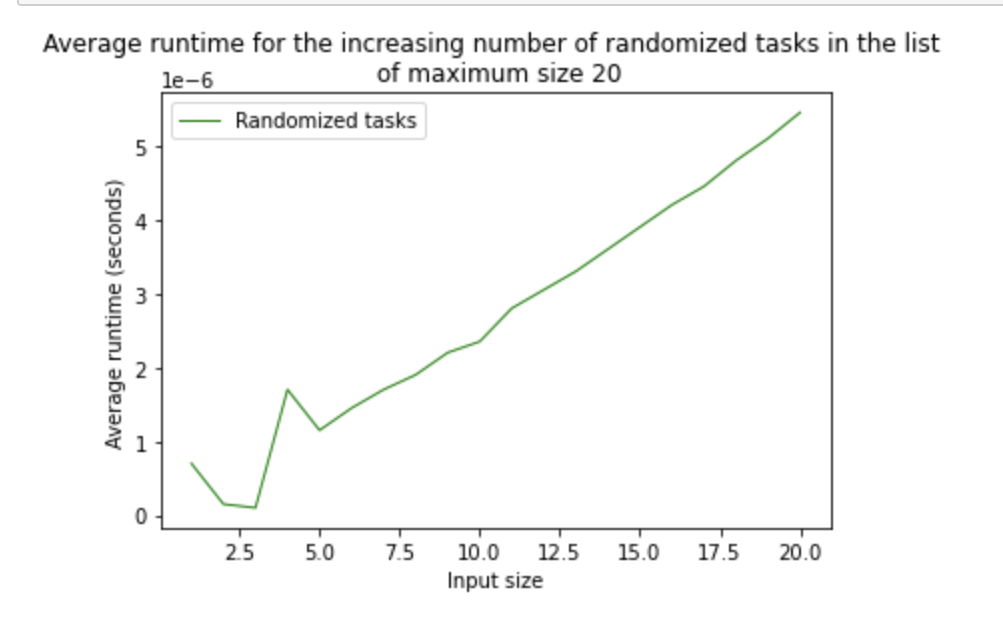

In [113]:
from IPython.display import Image
Image("input_20.png", width = 500)

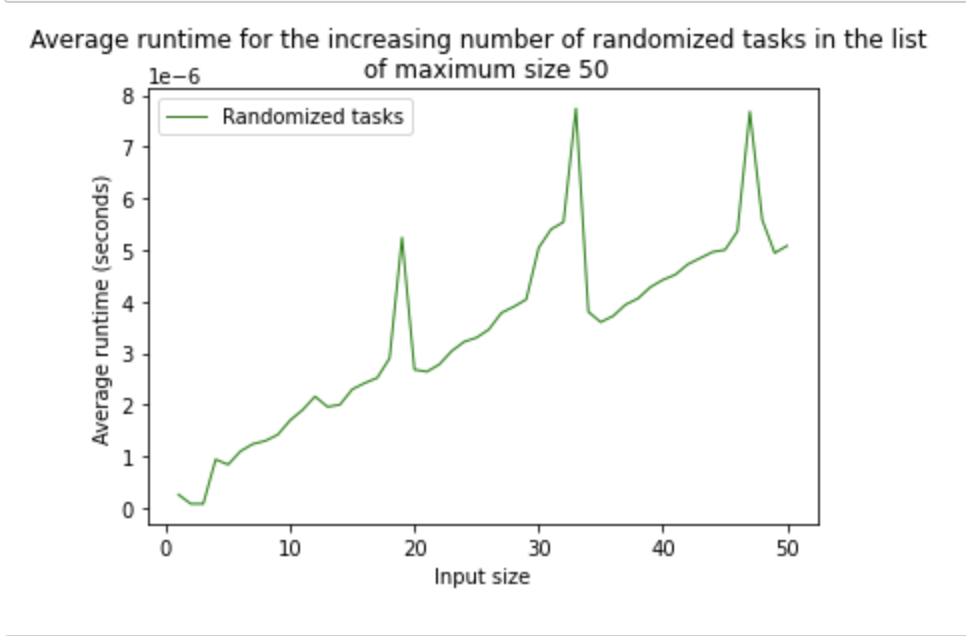

In [114]:
from IPython.display import Image
Image("input_50.png", width = 500)

## **<font color='green'> Q5 – Getting back to the board </font>**


**A**. If we wanted to use this task scheduler to make ourselves accountable for what is needed to be done throughout the day, and approximate timelines of the completions, this program would be exactly what we need! However, it does not incline towards time optimization and is not a quite accurate representation of the human’s day. If we had more tasks to include in this scheduler, we would still result in having time gaps as it was seen in the program’s output, which means that I did not account for the possibility of multitasking. This would allow us to maximize the number of tasks completed during the day and we could simultaneously do tasks like going to the market and writing a to-do list, which would result in faster task completion and would allow us to fit in more flexible tasks. 

**B**. For the algorithm improvement, I would work with three heaps instead of two, where the first one would be a heap created based on priorities of the fixed-time tasks (priorities calculated with regards to the start time), the second one would be based on priorities of dependencies of fixed-time tasks (priorities calculated with regard to a number of all dependencies), and the third one would be based on priorities of all the other tasks left (priorities calculated with regards to the duration). We would pop the element with the highest priority on top of the heap with the dependencies of fixed-time tasks (smallest number of dependencies ), and continue doing it until we executed all the dependencies of the first fixed-time task. We would further calculate the difference between the current time and the start of the fixed-time task, and if the time gap can fit in the task with the shortest duration (from the heap with all the flexible tasks left), we would execute that task. In this case, we will guarantee the accurate execution of the tasks each time. Moreover, we can add an attribute “task_classification” to the class Task and sort the tasks based on whether they are Personal, Travel (taking a bike/bus), Academic, and Social. Hence, if the task will be classified as Travel, we can add +15 minutes to the duration of the task to guarantee that any delays in terms of traffic, bus schedules will not affect the scheduler. If the task is classified as Social, we can add +30 minutes to the duration since these kinds of tasks will include friends gathering and social events that usually are delayed until everyone arrives because we want to eliminate the possibility of skipping the execution of a particular task because we haven’t finished the previous one. (**Word Count** - 301 words)


## **<font color='green'> Q6–Appendix Part I: LO and HC applications </font>**
#### #cs110-CodeReadability: 
The code implemented is well structured and includes the docstrings to each of the method and class including the input, attributes, expected output, used to ensure better information comprehension by the audience by being informative and self-contained. Moreover, the names of the methods, classes, attributes, additional variables, lists, dictionaries are easily understood, and are followed consistently throughout the implementation to ensure that the reader can follow the logic of the algorithm. Additional comments are added in places where the step might be unintuitive and a bit harder to figure out. Overall, the code uses consistent indentation and formatting which ensure better information comprehension by the reader. ( **Word Count**: 106 words)

#### #cs110-Professionalism: 
The report is well-structured and covers all the aspects of the assignment requirements by following the instructions and fully answering each question asked. Moreover, part of the explanations consist of technical jargon that is easily understood by the appropriate audience, and part of the assignment where the instructions ask to explain the algorithm to the person not taking CS110 includes explanations that are easily understood by the person who has no background knowledge in data structures and algorithms. The report uses the same font for each of the sections, highlights the names of the sections, code includes appropriate docstrings that help understand the logic behind the algorithm. (**Word Count** - 107 words) 

#### #cs110-PythonProgramming: 
The algorithm implemented produces the correct output with regard to the applied strategy of assigning priority. For the Task Scheduler to work, I needed to ensure that the implementation of class MinHeapq was correct since the execution of tasks in the Task Scheduler is heavily dependent on it. I provided three test cases via assert statements to guarantee that the tuples of the form (priority, ID) will form the min heap by adhering to the min-heap property. I used three different random inputs of various sizes where the priority was positive, negative and with decimals. For the Task Scheduler, I created an assert statement to confirm that the task order will not impact the output and still execute the tasks in the proper order because the priority was not calculated based on IDs.                           ( **Word Count** - 133 words)

#### #cs110 - AlgoStratDataStruct:
In questions 2(A and B), I explained the overall idea behind the algorithm in a language that can be understood by everyone to ensure that the idea behind the algorithm is easily comprehensible. I explained in great depth how the priority values are calculated, why we used the priority queue instead of the list, and why in particular heap should be used to implement the priority queue. I provided a detailed explanation that supports the algorithmic solution for the Task Scheduler in question 2 (C) by thoroughly talking through the code and explaining how particular methods and attributes were used for the scheduler implementation. (**Word Count** - 104 words)



#### #cs110 - ComputationalCritique:
I thoroughly explained why the priority queue implemented via heap data structure is more efficient than sorted lists since I dived deeper into the time efficiency of working with both data structures. I gave specific examples of operations that will be performed on the data structures and what time complexity they will result in having in Question 2 (i.e., heapify(), heappush(), heappop() in a heap, and insert(), sort() in list), which led me to the conclusion of using priority queues implemented with the min heap. The choice of min heap was explained with regard to priority calculations. Moreover, the implementation of the algorithm was done via OOP since it helped break the problem of creating a scheduler into smaller problems (methods) that were used to sequentially reach the goal state of outputting task execution. ( **Word Count** - 134 words)



#### #algorithms:
The algorithm used for creating a task scheduler has a defined set of steps that we should follow to get the output (i.e., get fixed-time tasks, get flexible-time tasks, create a dictionary with all the tasks, find all dependencies, calculate priorities, push nodes on the heap, extract them). The algorithm is robust enough since it can handle a range of inputs, which was particularly tested with randomization applied to the scheduler in Q4(C), and code provided in Appendix E/F. The algorithm is simple enough to understand and terminates in a finite number of steps. The algorithm was debugged to ensure we get the required output and troubleshoot the potential edge cases.(**Word Count** - 111 words)

#### #audience:
For the assignment, I tried to explain the concepts and main ideas in plain language that anyone could easily understand (in particular, in question 2(B)). The content was adjusted in a way that everyone could follow the main ideas behind the program and actually comprehend how the priority calculations were performed since this was the primary aspect of the assignment. In question 2(c), I provided more details on how the code works by walking through the methods and classes that were created, which required more technical jargon, which implies that the person with minimum programming knowledge would understand the logic behind and the data structures used for the program. (**Word Count** - 109 words)


#### #dataviz: 
I effectively used the implementation of Task Scheduler to create plots to analyze how it would perform for the increasing number of tasks in the list. I provided appropriate justification on how the code for the plots was created and why we were interested in randomizing the duration of the task and its start time. I emphasized specific aspects of data visualizations by pointing out the shape and how this might be interpreted in terms of time complexity. I analyzed the runtime for various inputs by specifying the exact number of seconds it might take for the given input to execute the scheduler. (**Word Count** - 103 words)

## **<font color='green'> Q7 – Appendix Part II: Python code </font>**


### Appendix A - OOP implementation of Min Heap

In [96]:
#Code is taken from CS110 Session 13 - [7.2] Heaps and priority queues and adjusted to satisfy the goals of the algorithm 
class MinHeapq:
    """ 
    A class that implements properties and methods 
    that support a min priority queue data structure

    Attributes
    ----------
    heap : arr
        A Python list where key values in the min heap are stored
    heap_size: int
        An integer counter of the number of keys present in the min heap
    """  

    def __init__(self):    
        """
        Parameters
        ----------
        None
        """    
        self.heap= []
        self.heap_size  = 0
        
    def left(self, i):
        """
        Takes the index of the parent node
        and returns the index of the left child node

        Parameters
        ----------
        i: int
          Index of parent node

        Returns
        ----------
        int
          Index of the left child node

        """
        return 2 * i + 1

    def right(self, i):
        """
        Takes the index of the parent node
        and returns the index of the right child node
        
        Parameters
        ----------
        i: int
            Index of parent node

        Returns
        ----------
        int
            Index of the right child node

        """

        return 2 * i + 2
    
    def parent(self, i):
        """
        Takes the index of the child node
        and returns the index of the parent node
        
        Parameters
        ----------
        i: int
            Index of child node

        Returns
        ----------
        int
            Index of the parent node

        """

        return (i - 1)//2

    def mink(self):     
        """
        Returns the smallest key in the priority queue. 
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the smallest key in the priority queue

        """
        return self.heap[0]     
    
  
    def heappush(self, task_priority):  
        """
        Insert a key (priority of the task) into a priority queue maintaining the 
        min heap property 
        
        Parameters
        ----------
        task: list 
            List of 2 elements created from a tuple of the form (priority value, ID)
             
        Returns
        ----------
        None
        """
        key = task_priority[0] #task_priority is a tuple of form (priority, id)
        task_priority[0] = float("inf")   
        self.heap.append(task_priority)  
        self.decrease_key(self.heap_size, key)  
        self.heap_size += 1
        
    def decrease_key(self, i, key): 
        """
        Modifies the value of a key in a min priority queue
        with a smaller value
        
        Parameters
        ----------
        i: int
            The index of the key to be modified
        key: int
            The new key value

        Returns
        ----------
        None
        """
        if key > self.heap[i][0]:
            raise ValueError('New key is larger than the current key')
        self.heap[i][0] = key  
        
        while i > 0 and self.heap[self.parent(i)][0] > self.heap[i][0]: 
            j = self.parent(i)
            holder = self.heap[j]

            self.heap[j] = self.heap[i]
            self.heap[i] = holder

            i = j    
            
       
    def heapify(self, i):
        """
        Creates a min heap from the index given
        (index is the root node of the subtree that we need ot heapify)
        
        Parameters
        ----------
        i: int
            The index of of the root node of the subtree to be heapify

        Returns
        ----------
        None
        """
        l = self.left(i)
        r = self.right(i)

        heap = self.heap
        if l <= (self.heap_size-1) and heap[l][0] < heap[i][0]:
            smallest = l 

        else:
            smallest = i

        if r <= (self.heap_size-1) and heap[r][0] < heap[smallest][0]:
            smallest = r

        if smallest != i:
            heap[i], heap[smallest] = heap[smallest], heap[i] 
            self.heapify(smallest) 
            
    def heappop(self):
        """
        Returns the smallest key in the mim priority queue
        and remove it from the mim priority queue
        
        Parameters
        ----------
        None

        Returns
        ----------
        int
            the min value in the heap that is extracted
        """
        if self.heap_size < 1:
            raise ValueError('Heap underflow: There are no keys in the priority queue ')

        mink = self.heap[0] #tuple at the top of the list of the form (smallest priority, ID)

        self.heap[0] = self.heap[-1] 

        self.heap.pop()
        self.heap_size -= 1

        self.heapify(0) #restoring min heap structure  
        return mink

### Appendix A - OOP implementation of Task Scheduler 
Print statements in run_task_scheduler() are commented to ensure that we do not produce schedules for the increasing size of lists in plot examinations. 

In [106]:
from typing import List, Dict
from collections import deque

class Task:
    """
    This is a Task class that stores the information about the instance of the task.  
    Attributes
    ----------
    id : integer
        This is the ID of the task, corresponding to the parameter id.
    time : integer
        This is the starting time of the task, corresponding to the parameter time.
    description : str
        This is the description of the task, corresponding to the parameter description.
    duration : integer
        This is the duration of the task, corresponding to the parameter duration.
    status : str
        This is status of the task, corresponding to the parameter status.
    priority : integer
        This is the priority of the task, corresponding to the parameter rotation_city .
    """
    def __init__(self, id: int, time: int, description: str, duration: int, dependencies: List[int], status: str, priority: int):
        
        self.id = id
        self.time = time
        self.description = description
        self.duration = duration
        self.dependencies = dependencies
        self.status = status
        self.priority = priority

   

    def __repr__(self):
        #return f"Task id: {self.id} priority: {self.priority}   \n"
        return f"Task ID : {self.id}, time : {self.time}, description : {self.description}, duration : {self.duration}, dependencies : {self.dependencies}, status : {self.status}, priority : {self.priority}"



class Dependencies:
    """ 
    A class that implements the methods for finding all the dependencies of 
    the task (dependencies of dependencies), and calculates priorities for 
    the tasks dependending on whether they are fixed or flexible. 

    Attributes
    ----------
    task_map : dict
        A Python dictionary where key values are the IDs of the particular tasks, 
        and the values is the list of all the input attributes given 
        (id, start time, description, duration, dependencies, status and priority)

    """  

    def __init__(self, tasks: List[Task]):
        self.task_map = {task.id: task for task in tasks}


        
   #get dependencies of the dependencies in form of dictionary for all tasks 
    def get_all_dependencies(self) -> Dict[int, List[int]]:
        """
        Creating a dictionary where the key is the ID of the task, and values are the 
        list of all dependencies (dependencies of dependencies).

        Parameters
        ----------
        None

        Returns
        ----------
        Dict
            Dictionary where values are the lists of all the dependencies, 
            and keys are the IDs of the tasks

        """
        res = {}
        for key in self.task_map.keys():
            res[key] = self.get_task_dependencies(key)
        return res



    def get_task_dependencies(self, id: int): #graph search 
        """
        Creating a list of all the dependencies of the task, meaning that 
        it finds the dependencies of the initial dependencies
        using queue

        Parameters
        ----------
        ID: int
            ID of the task to gather the dependencies of

        Returns
        ----------
        List
            List containing all the dependencies of the given task

        """
        if self.task_map.get(id) is None:
            raise KeyError(f"No key with value {id}")
        result = [] 
        queue = deque(self.task_map.get(id).dependencies)
        while queue: 
            cur_id = queue.pop()
            result.append(cur_id)
            for dependency in self.task_map.get(cur_id).dependencies:
                queue.append(dependency)
        return result #list of all dependencies of dependencies of a particular task
   



    def priority_time_bound_task(self, tasks_map: Dict[int, List[int]]):
        """
        Creating a list of tuples where the first element corresponds to the
        priority of the time bound task based on the start time, and
        the second element is the ID of the time bound task. 

        Parameters
        ----------
        tasks_map: Dict
            Dictionary where the IDs of the task is a key, and values 
            are all the attributes given in the Task class (id, start time, 
            description, dependencies, status, priority, duration)

        Returns
        ----------
        List
            List containing tuples of the form (priority based on the start time, ID)
            for the time bound tasks 

        """
        list_of_fixed_time_tasks = tasks_map.filter_time_bound_tasks(True)   #getting all the IDs of tasks that have fixed time 

        priority_list = [] #initializing list of tuples of form (priority based on the start time, id)
        tuples_list = []  #initializing list of tuples of form (starting time, id)

        for element in list_of_fixed_time_tasks:
            tuples_list.append((self.task_map[element].time, self.task_map[element].id)) #creating tuples of the form (start_time, id)
            
        for tuple_ in tuples_list:
            tuple_ = list(tuple_) #tuples are immutable, so we can't chaneg anything inside
            cur_priority = self.task_map[tuple_[1]].time 
            if self.task_map[tuple_[1]].priority == 0:
                self.task_map[tuple_[1]].priority = cur_priority
                priority_list.append((cur_priority, self.task_map[tuple_[1]].id)) 
                
        return priority_list



    def priority_flexible(self, dependencies: Dict[int, List[int]]):
        """
        Creating a list of tuples where the first element corresponds 
        to the priority of the flexible task based on the number of dependencies and duration, and
        the second element is the ID of the flexible task. 

        Parameters
        ----------
        dependencies: Dict
            Dictionary where the IDs of the task is a key, and values are 
            all gathered dependencies (dependencies of dependencies)

        Returns
        ----------
        List
            List containing tuples of the form (
            priority based on the number of all dependencies and duration/1000000, ID)
            for the flexible tasks. 

        """
        input_tasks = self.task_map 
        flexible_tasks = {} #initializing dictionary where all the flexible tasks Ids will be keys, and list of dependencies will be values 
        list_of_priorities = []
        

        for i in input_tasks: 
            if self.task_map[i].priority == 0 and self.task_map[i].time == 0: #additional checks to we avoid duplicates 
                flexible_tasks[i] = self.get_task_dependencies(i)

        for key, dependencies in flexible_tasks.items(): 
            self.task_map[key].priority = len(dependencies) +  (self.task_map[key].duration)/100000
            list_of_priorities.append((self.task_map[key].priority, self.task_map[key].id))
            
        return list_of_priorities



class TaskMap:
    def __init__(self, tasks: List[Task]):
        self.task_map = {task.id: task for task in tasks}



    def filter_time_bound_tasks(self, time_bound: bool):
        """
        Getting tasks of interest: time bound or flexible tasks. 
        
        Parameters
        ----------
        time_bound: bool
            True or False depending on what kind of tasks we want to wotk with:

            True - executing time bound tasks
            False - executing flexible tasks

        Returns
        ----------
        List
            List containing IDs of either time bound tasks or flexible tasks.
        """
        result = []
        for id in self.task_map:
            
            if bool(self.task_map[id].time) == time_bound: # 0 corresponds to False, number greater than 0 correspond to True 
                result.append(self.task_map[id].id) 
                
        return result



class TaskScheduler:
    """
    A Simple Daily Task Scheduler that uses priority queues to execute
    the tasks scheduled for the day in the right order 
    
    Attributes
    ----------
    tasks : List
        List of all the given tasks with their attributes 

    task_map : Dict 
        A Python dictionary where key values are the IDs of the particular tasks, 
        and the values is the list of all the input attributes given 

    priority_queue_fixed : min heap 
        A priority queue of fixed time tasks that has the min heap structure 
        
    priority_queue_flexible : min heap
        A priority queue of flexible time tasks that has the min heap structure 
    """

    
    def __init__(self, tasks):
        self.tasks = tasks
        self.task_map = {task.id: task for task in tasks}
        self.priority_queue_fixed = MinHeapq()
        self.priority_queue_flexible = MinHeapq()
        self.id_list = [] #initializing the list of IDs to ensure 
        #that the code will work for the different inputs
    
            

    def create_heap_fixed(self, time_bound_tasks):
        """
        Creating min heap where the root node will be the 
        fixed time task with the smallest priority 
        
        Parameters
        ----------
        time_bound_tasks: List
            List of IDs of fixed time tasks

        Returns
        ----------
        Heap
            Creates a min heap of the tuples of the form
            (priority of fixed time task, ID)
        """       
        for fixed_task in time_bound_tasks:
            self.priority_queue_fixed.heappush([self.task_map[fixed_task].priority, self.task_map[fixed_task].id])
        return self.priority_queue_fixed.heap


    def create_heap_flexible(self, flexible_tasks):
        """
        Creating min heap where the root node will be 
        flexible task with the smallest priority 
        
        Parameters
        ----------
        flexible_tasks: List
            List of IDs of flexible time tasks

        Returns
        ----------
        Heap
            Creates a min heap of the tuples of the form
            (priority of flexible time task, ID)
        """ 
        for flex_task in flexible_tasks:
            self.priority_queue_flexible.heappush([self.task_map[flex_task].priority, self.task_map[flex_task].id]) 
        return self.priority_queue_flexible.heap
        

  
    def format_time(self, time):
        return f"{time//60}h{time%60:02d}"

    
    def run_task_scheduler(self, starting_time):
        """
        Creating the scheduler for the day, where the tasks will be 
        executed based on their priority, and time gaps. 
        
        Parameters
        ----------
        starting_time: integer
            Integer representing when the day starts 

        Returns
        ----------
        Scheduler
            Creates a scheduler based on the order of task execution 
        """ 
        current_time = starting_time
        #print("Running a simple scheduler:\n")

        #check whether the heap with the fixed-time tasks haven't exausted itself yet
        while len(self.priority_queue_fixed.heap) > 0:

            fixed_task = self.task_map[self.priority_queue_fixed.heappop()[1]]


            #check if the heap with flexible-time tasks is not empty yet
            #and whether the current time + duration of the first flexible task (on top of the min heap)
            #is less than the start of the fixed time task
            while len(self.priority_queue_flexible.heap) > 0 and current_time + self.task_map[self.priority_queue_flexible.mink()[1]].duration <= fixed_task.time:
                
                flexible_task = self.task_map[self.priority_queue_flexible.heappop()[1]] #pop the task with the particular ID under index 1 in the tuple of form (priority, ID)
                #print(f" ⏰ t = {self.format_time(current_time)}")
                #print(f"\t✨ Started executing task '{flexible_task.description}' for {flexible_task.duration} minutes")

                current_time += flexible_task.duration
                self.id_list.append((flexible_task.id, flexible_task.priority))
                flexible_task.status = "Completed"
               # print(f"\t✅ t = {self.format_time(current_time)}, task {flexible_task.duration} completed with priority {flexible_task.priority}!\n") 

            #print(f"\t⏳ You have a time gap of {fixed_task.time - current_time} minutes. Are there any tasks you forgot to include and need to do?")
            current_time = fixed_task.time
           # print(f" ⏰  t = {self.format_time(current_time)}")
            #print(f"\t✨ Started executing task '{fixed_task.description}' for {fixed_task.duration} minutes")
            current_time += fixed_task.duration
            self.id_list.append((fixed_task.id, fixed_task.priority))
            fixed_task.status = "Completed"
           # print(f"\t✅ t = {self.format_time(current_time)}, task '{fixed_task.description}' completed with priority {fixed_task.priority}\n")
            
            #check whether the heap with the flexible tasks is not empty yet and pop elements out if there are no more 
            #fixed time tasks 
            while len(self.priority_queue_flexible.heap) > 0:

                flexible_task = self.task_map[self.priority_queue_flexible.heappop()[1]]  #popping the task with a particular ID which is under index 1 
                #print(f" ⏰  t = {self.format_time(current_time)}")
                #print(f"\t✨ Started task '{flexible_task.description}' for {flexible_task.duration} minutes")

                current_time += flexible_task.duration
                self.id_list.append((flexible_task.id, flexible_task.priority))
                flexible_task.status = "Completed"
                #print(f"\t✅ t = {self.format_time(current_time)}, task '{flexible_task.description}' completed with priority {flexible_task.priority}\n") 
        
        #print(f" ⏰  t = {self.format_time(current_time)} Finish time!")
        total_time = current_time - starting_time        
        #print(f"\n🏁 Completed all planned tasks in {total_time//60}h{total_time%60:02d}min! You are done for the day 🎉")
        return self.id_list
    


                
                
def main():
    tasks = [ Task(id = 0, time = 0, description = "Prepare for work-study meeting", duration = 30, dependencies = [], status = "N", priority = 0),
        Task(id = 1, time = 540, description = "Have a work-study meeting with teammate Misha", duration = 45, dependencies =[0], status = "N", priority = 0),
        Task(id = 2, time = 0, description ="Dedicate time to revisit notes and do PCW for CS111", duration = 115, dependencies = [1], status = "N", priority = 0), 
        Task(id = 3, time = 1200, description ="Take CS111", duration = 90,dependencies = [2], status = "N", priority = 0), 
        Task(id = 4, time = 0, description = "Write a to-do list for the next day", duration = 15, dependencies =[0], status = "N", priority = 0), 
        Task(id = 5, time = 0, description = "Go to Drunken Moon Lake with friends",duration =  120, dependencies =[2, 4], status = "N", priority = 0), 
        Task(id = 6, time = 0, description = "Visit Baoan Temple near the residence hall", duration = 75, dependencies = [4], status = "N", priority = 0),
        Task(id = 7, time = 960, description = "Eat Taiwanese traditional food at the market", duration = 60, dependencies = [2, 6], status = "N", priority = 0)
    ]



    tasks_map = TaskMap(tasks)
    task_scheduler = TaskScheduler(tasks)

    time_bound_tasks = tasks_map.filter_time_bound_tasks(True)
    print("All fixed time tasks:", time_bound_tasks)


    flexible_tasks = tasks_map.filter_time_bound_tasks(False)
    print("All flexible time tasks:", flexible_tasks)

    dependencies_ = Dependencies(tasks)
    print("List of IDs of all dependendencies of the tasks", dependencies_.get_all_dependencies())

    time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map)
    print("Priorities of time bound tasks", time_bound_tasks_priorities)

    flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)
    print("Priorities of flexible time tasks:", flexible_tasks_priorities)
    
    heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
    print("Heap created from fixed tasks", heap_fixed)

    heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)
    print("Heap created from flexible tasks", heap_flexible)


    start_scheduler = 8*60
    print(task_scheduler.run_task_scheduler(start_scheduler))
    



if __name__ == "__main__":
    main()

All fixed time tasks: [1, 3, 7]
All flexible time tasks: [0, 2, 4, 5, 6]
List of IDs of all dependendencies of the tasks {0: [], 1: [0], 2: [1, 0], 3: [2, 1, 0], 4: [0], 5: [4, 0, 2, 1, 0], 6: [4, 0], 7: [6, 4, 0, 2, 1, 0]}
Priorities of time bound tasks [(540, 1), (1200, 3), (960, 7)]
Priorities of flexible time tasks: [(0.0003, 0), (2.00115, 2), (1.00015, 4), (5.0012, 5), (2.00075, 6)]
Heap created from fixed tasks [[540, 1], [1200, 3], [960, 7]]
Heap created from flexible tasks [[0.0003, 0], [2.00075, 6], [1.00015, 4], [5.0012, 5], [2.00115, 2]]
[(0, 0.0003), (4, 1.00015), (1, 540), (6, 2.00075), (2, 2.00115), (5, 5.0012), (7, 960), (3, 1200)]


### Appendix C - Checking the implementation of Min Heap

In [98]:
#list of 8 random sublist of the form (priority, id)

A = [[6, 1],[4, 0],[7, 2],[9, 6], [5, 3], [8, 5], [12, 4], [0, 7], [3, 8]]
min_heap = MinHeapq()

for key in A:
    min_heap.heappush(key)
min_heap_list = min_heap.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[0, 7], [3, 8], [7, 2], [4, 0], [6, 1], [8, 5], [12, 4], [9, 6], [5, 3]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[0, 7], [3, 8], [7, 2], [4, 0], [6, 1], [8, 5], [12, 4], [9, 6], [5, 3]]
✅ Your code returned the expected result!


In [99]:
# list of 5 random sublists of the form (priority, id)
B = [[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]]
min_heap_1 = MinHeapq()

for key in B:
    min_heap_1.heappush(key)
min_heap_list = min_heap_1.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[0, 1], [2, 0], [0, 5], [3, 4], [5, 2]]
✅ Your code returned the expected result!


In [100]:
# list of 7 random sublists containing negative priorities and priorities with decimals
C = [[12, 8],[-3, 4],[0.5, 5],[3.33, 3], [5, 0], [12.99, 2], [1.21, 1]]
min_heap_2 = MinHeapq()

for key in C:
    min_heap_2.heappush(key)
min_heap_list = min_heap_2.heap
print(min_heap_list)

try:
    assert(min_heap_list == [[-3, 4], [3.33, 3], [0.5, 5], [12, 8], [5, 0], [12.99, 2], [1.21, 1]])
    print("✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

[[-3, 4], [3.33, 3], [0.5, 5], [12, 8], [5, 0], [12.99, 2], [1.21, 1]]
✅ Your code returned the expected result!


### Appendix D - Checking the implementation of Task Scheduler 

In [104]:
#shuffling the order of the tasks inserted into the list tasks

tasks = [ Task(id = 2, time = 0, description ="Dedicate time to revisit notes and do PCW for CS111", duration = 115,
               dependencies = [1], status = "N", priority = 0), 
        Task(id = 0, time = 0, description = "Prepare for work-study meeting", duration = 30, 
             dependencies = [], status = "N", priority = 0),
        Task(id = 1, time = 540, description = "Have a work-study meeting with teammate Misha", duration = 45,
             dependencies =[0], status = "N", priority = 0),
        Task(id = 4, time = 0, description = "Write a to-do list for the next day", duration = 15, 
             dependencies =[0], status = "N", priority = 0), 
        Task(id = 5, time = 0, description = "Go to Drunken Moon Lake with friends",duration =  120, 
             dependencies =[2, 4], status = "N", priority = 0), 
        Task(id = 7, time = 960, description = "Eat Taiwanese traditional food at the market", duration = 60,
             dependencies = [2, 6], status = "N", priority = 0),
        Task(id = 3, time = 1200, description ="Take CS111", duration = 90,
             dependencies = [2], status = "N", priority = 0), 
        Task(id = 6, time = 0, description = "Visit Baoan Temple near the residence hall", duration = 75, 
             dependencies = [4], status = "N", priority = 0)
         ]
    

tasks_map = TaskMap(tasks)
task_scheduler = TaskScheduler(tasks)

time_bound_tasks = tasks_map.filter_time_bound_tasks(True) #getting fixed-time tasks
flexible_tasks = tasks_map.filter_time_bound_tasks(False) #getting flexible-time tasks
dependencies_ = Dependencies(tasks)
time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map) 
flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)
heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)
start_scheduler = 8*60
list_of_ids = task_scheduler.run_task_scheduler(start_scheduler)

print("Order of Task IDs executed:", list_of_ids)

try:
    assert(list_of_ids == [(0, 0.0003), (4, 1.00015), (1, 540), (6, 2.00075), (2, 2.00115), (5, 5.0012), (7, 960), (3, 1200)])
    print("\n ✅ Your code returned the expected result!")
except:
    print("🐞 Something is not quite as expected")

Running a simple scheduler:

 ⏰ t = 8h00
	✨ Started executing task 'Prepare for work-study meeting' for 30 minutes
	✅ t = 8h30, task 30 completed with priority 0.0003!

 ⏰ t = 8h30
	✨ Started executing task 'Write a to-do list for the next day' for 15 minutes
	✅ t = 8h45, task 15 completed with priority 1.00015!

	⏳ You have a time gap of 15 minutes. Are there any tasks you forgot to include and need to do?
 ⏰  t = 9h00
	✨ Started executing task 'Have a work-study meeting with teammate Misha' for 45 minutes
	✅ t = 9h45, task 'Have a work-study meeting with teammate Misha' completed with priority 540

 ⏰  t = 9h45
	✨ Started task 'Visit Baoan Temple near the residence hall' for 75 minutes
	✅ t = 11h00, task 'Visit Baoan Temple near the residence hall' completed with priority 2.00075

 ⏰  t = 11h00
	✨ Started task 'Dedicate time to revisit notes and do PCW for CS111' for 115 minutes
	✅ t = 12h55, task 'Dedicate time to revisit notes and do PCW for CS111' completed with priority 2.00115



### Appendix E - Plotting the behavior of Task Scheduler with increasing size of the list for randomized tasks (max size 20)

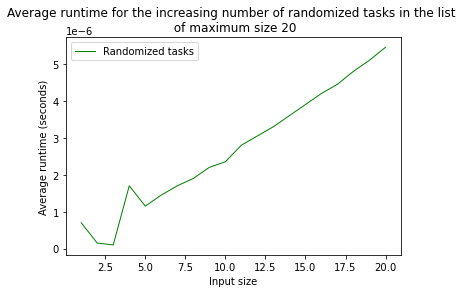

In [107]:
import time        
import random 
import matplotlib.pyplot as plt    


input_list = list(range(1, 21)) #creating the list of numbers to 20 to further compile lists
duration_time = list(range(15, 135, 15)) #creating the list of duration times with 15 min step
start_time = list(range(480, 1200, 60)) #creating the list of the start times of tasks (assuming that day is only 12 hours)
starting_time = 8*60
time_ = [] #initializing the list to store the runtime 
task_list = []
runtime = [] #initializing the list to store average runtime
for task_id in input_list:
    if task_id // 2 == 2 or task_id // 2 == 4 or task_id % 6 == 0: #condition for having fixed-time tasks
        create_random_task = Task(id = task_id, time = random.choice(start_time), description = "Fixed", 
        duration = random.choice(duration_time), dependencies = [], status = "N", priority = 0)
        task_list.append(create_random_task)

    else:
        create_random_task = Task(id = task_id, time = 0, description = "Flexible", 
                                  duration = random.choice(duration_time),
        dependencies = [], status = "N", priority = 0)
        task_list.append(create_random_task)
    
    
    task_scheduler = TaskScheduler(task_list)
    tasks_map = TaskMap(task_list)
    time_bound_tasks = tasks_map.filter_time_bound_tasks(True)
    flexible_tasks = tasks_map.filter_time_bound_tasks(False)
    dependencies_ = Dependencies(task_list)
    time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map)
    flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)
    heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
    heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)
    
    start_timer = time.process_time()
    task_scheduler.run_task_scheduler(starting_time)
    time_.append((time.process_time() - start_timer))

for element in time_: #finding average 
    runtime.append(element/20)




plt.plot(input_list, runtime, label = "Randomized tasks",  color = "green", linewidth = 1.0) 
plt.title("Average runtime for the increasing number of randomized tasks in the list \n of maximum size 20")
plt.xlabel("Input size")
plt.ylabel("Average runtime (seconds)")
plt.legend()
plt.show()

### Appendix F  - Plotting the behavior of Task Scheduler with increasing size of the list for randomized tasks (max size 50)

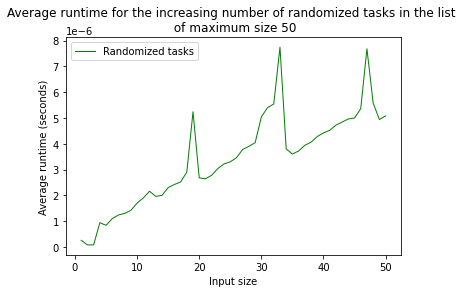

In [108]:
import time        
import random 
import matplotlib.pyplot as plt    


input_list = list(range(1, 51)) #creating the list of numbers to 50 to further compile lists
duration_time = list(range(15, 135, 15)) #creating the list of duration times with 15 min step
start_time = list(range(480, 1200, 60)) #creating the list of the start times of tasks (assuming that day is only 12 hours)
starting_time = 8*60
time_ = [] #initializing the list to store the runtime 
task_list = []
runtime = [] #initializing the list to store average runtime
for task_id in input_list:
    if task_id // 2 == 2 or task_id // 2 == 6 or task_id % 4 == 0: #condition for having fixed-time tasks
        create_random_task = Task(id = task_id, time = random.choice(start_time), description = "Fixed", 
        duration = random.choice(duration_time), dependencies = [], status = "N", priority = 0)
        task_list.append(create_random_task)

    else:
        create_random_task = Task(id = task_id, time = 0, description = "Flexible", 
                                  duration = random.choice(duration_time),
        dependencies = [], status = "N", priority = 0)
        task_list.append(create_random_task)
    
    
    task_scheduler = TaskScheduler(task_list)
    tasks_map = TaskMap(task_list)
    time_bound_tasks = tasks_map.filter_time_bound_tasks(True)
    flexible_tasks = tasks_map.filter_time_bound_tasks(False)
    dependencies_ = Dependencies(task_list)
    time_bound_tasks_priorities = dependencies_.priority_time_bound_task(tasks_map)
    flexible_tasks_priorities = dependencies_.priority_flexible(dependencies_)
    heap_fixed = task_scheduler.create_heap_fixed(time_bound_tasks)
    heap_flexible = task_scheduler.create_heap_flexible(flexible_tasks)
    
    start_timer = time.process_time()
    task_scheduler.run_task_scheduler(starting_time)
    time_.append((time.process_time() - start_timer))

for element in time_: #finding average 
    runtime.append(element/50)




plt.plot(input_list, runtime, label = "Randomized tasks",  color = "green", linewidth = 1.0) 
plt.title("Average runtime for the increasing number of randomized tasks in the list \n of maximum size 50")
plt.xlabel("Input size")
plt.ylabel("Average runtime (seconds)")
plt.legend()
plt.show()